In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import os
os.listdir('./data')

['Pre_Season_Batter.csv',
 'submission.csv',
 'Regular_Season_Batter.csv',
 'Regular_Season_Batter_Day_by_Day_b4.csv']

In [5]:
preseason_df = pd.read_csv('./data/Pre_Season_Batter.csv')
regularseason_df = pd.read_csv('./data/Regular_Season_Batter.csv')
print(preseason_df.shape)
display(regularseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [6]:
display(preseason_df.info())
display(preseason_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

None

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


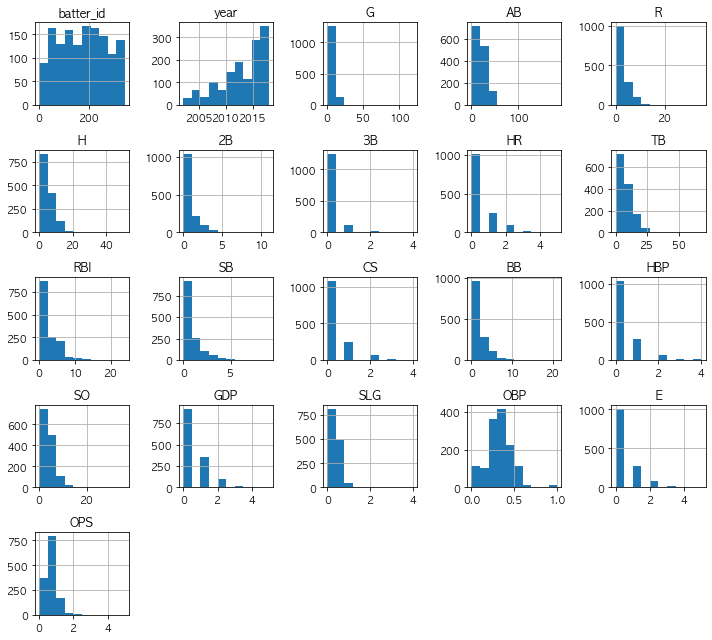

In [7]:
preseason_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [8]:
regular_count = regularseason_df.groupby('year')['batter_id'].count().rename('regular')

In [14]:
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [15]:
pd.concat([regular_count,preseason_count,np.round(preseason_count/regular_count, 2).rename('ratio')], axis = 1).T.loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


preseason 기록이 regular에 비해서 부족한 상태임을 알 수 있음

In [16]:
regularseason_df['new_idx'] = regularseason_df['batter_name'] + regularseason_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

intersection_idx = list(set(regularseason_df['new_idx']).intersection(preseason_df['new_idx']))

In [17]:
intersection_idx

['오선진2018',
 '김회성2017',
 '황재균2016',
 '최진행2015',
 '채은성2018',
 '김용의2013',
 '정수빈2011',
 '김재호2004',
 '윤석민2007',
 '이해창2018',
 '서동욱2010',
 '최정2008',
 '김하성2018',
 '유재신2009',
 '정의윤2011',
 '이지영2014',
 '김회성2010',
 '백창수2018',
 '한동민2014',
 '정상호2002',
 '노수광2018',
 '이범호2002',
 '최윤석2011',
 '손주인2015',
 '김민성2010',
 '오재일2015',
 '이택근2006',
 '정의윤2017',
 '김주형2008',
 '박경수2015',
 '박한이2016',
 '최준석2017',
 '정진호2011',
 '김선빈2013',
 '박기혁2017',
 '김동한2016',
 '박병호2013',
 '이흥련2015',
 '유한준2011',
 '이용규2005',
 '노진혁2018',
 '이진영2017',
 '김강민2013',
 '임병욱2018',
 '오재원2012',
 '손아섭2016',
 '채태인2018',
 '문규현2011',
 '이해창2011',
 '김동한2013',
 '박한이2003',
 '김헌곤2013',
 '최형우2016',
 '김문호2007',
 '조동찬2018',
 '박용택2012',
 '이형종2017',
 '김재율2012',
 '박용택2018',
 '안익훈2015',
 '심우준2018',
 '김하성2016',
 '김문호2016',
 '최진행2005',
 '최진행2016',
 '이상호2013',
 '오지환2010',
 '조동화2016',
 '이용규2006',
 '양성우2016',
 '박용택2009',
 '정근우2016',
 '백민기2015',
 '서건창2017',
 '김재호2008',
 '김민하2014',
 '김동엽2016',
 '김회성2009',
 '손아섭2007',
 '이대형2014',
 '이진영2002',
 '이택근2007',
 '이천웅2016',
 '최주환

In [21]:
## 교집합에 존재하는 값만 가져오기
regularseason_new = regularseason_df.loc[\
    regularseason_df['new_idx'].apply(\
    lambda x : x in intersection_idx)\
].copy()

## 교집합에 존재하는 값만 가져오기
preseason_new = preseason_df.loc[\
    preseason_df['new_idx'].apply(\
    lambda x : x in intersection_idx)\
].copy()

In [22]:
regularseason_new = regularseason_new.sort_values(by='new_idx').reset_index(drop = True)
preseason_new = preseason_new.sort_values(by='new_idx').reset_index(drop = True)

In [24]:
print(regularseason_new.shape, preseason_new.shape)

(1358, 30) (1358, 30)


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


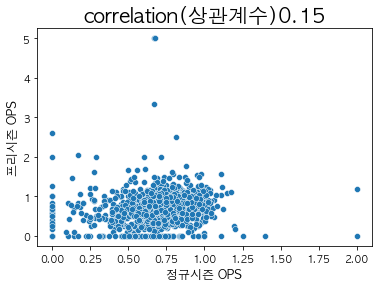

In [26]:
correlation = regularseason_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regularseason_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수)' + str(np.round(correlation,2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()

분포가 선형적인 모습을 띄지 않고 있기 때문에 상관성이 없다  
=> 정규시즌 분석이기 때문에 프리시즌 데이터 사용하지 않겠음

In [28]:
regularseason_df = pd.read_csv('./data/Regular_Season_Batter.csv')

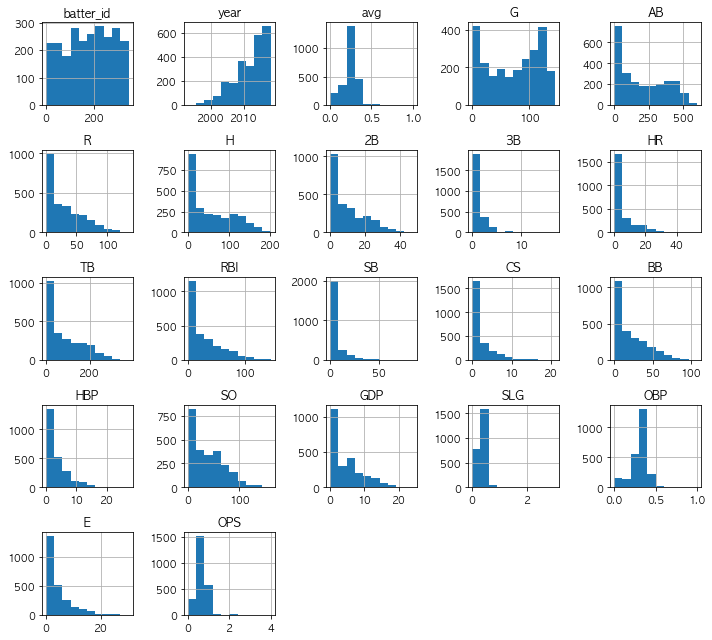

In [29]:
regularseason_df.hist(figsize = (10,9))
plt.tight_layout()
plt.show()

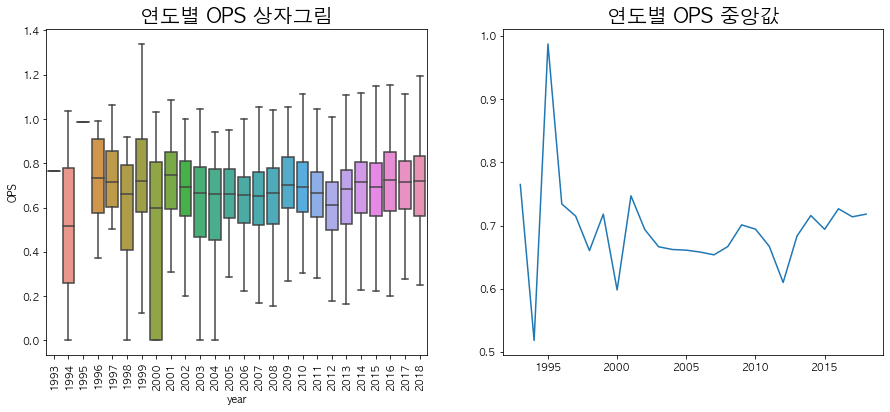

In [33]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x = 'year', y = 'OPS', data = regularseason_df, showfliers = False)
g.set_title('연도별 OPS 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
plt.subplot(1,2,2)
plt.plot(regularseason_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

OPS가 2000 년도 후반으로 급격히 안정화되었음을 알 수 있음

In [36]:
med_OPS_team = regularseason_df.pivot_table(index = ['team'], columns = 'year', values = 'OPS', aggfunc = 'median')
med_OPS_team

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,...,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,...,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,...,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,...,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,...,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


In [37]:
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis=1)<=0

In [39]:
team_idx

team
KIA      True
KT      False
LG       True
NC      False
OB      False
SK       True
넥센      False
두산       True
롯데       True
삼성       True
쌍방울     False
우리      False
한화       True
해태      False
현대      False
히어로즈    False
dtype: bool

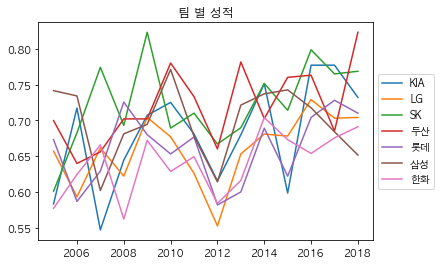

In [42]:
plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx,2005:].T.columns, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('팀 별 성적')
plt.show()

In [43]:
import re

In [45]:
regularseason_df['height/weight']

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [47]:
regularseason_df['weight']

0       93.0
1       72.0
2       72.0
3       72.0
4       72.0
        ... 
2449    82.0
2450    82.0
2451    82.0
2452    82.0
2453    82.0
Name: weight, Length: 2454, dtype: float64

In [46]:
regularseason_df['weight'] = regularseason_df['height/weight'].apply(\
                lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

In [48]:
regularseason_df['height'] = regularseason_df['height/weight'].apply(\
                lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)

In [49]:
print(regularseason_df['height/weight'][0], regularseason_df['height'][0], regularseason_df['weight'][0] )

177cm/93kg 177.0 93.0


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


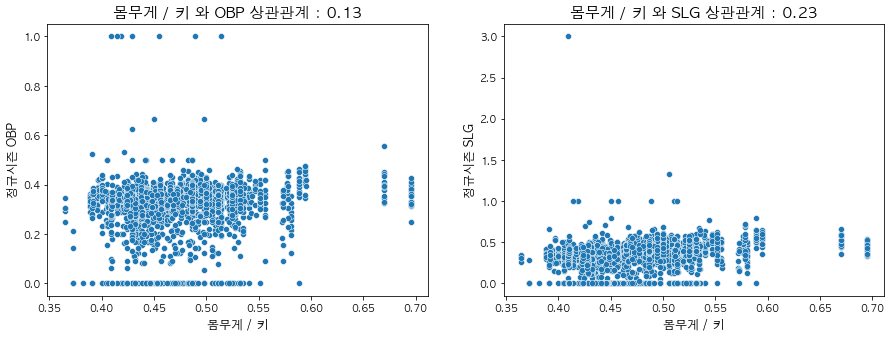

In [50]:
regularseason_df['weight_per_height'] = regularseason_df['weight'] / regularseason_df['height']
plt.figure(figsize = (15,5))

plt.subplot(1,2,1) ## OBP 출루율
correlation = regularseason_df['weight_per_height'].corr(regularseason_df['OBP'])
sns.scatterplot(regularseason_df['weight_per_height'], regularseason_df['OBP'])
plt.title("몸무게 / 키 와 OBP 상관관계 : " + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 OBP', fontsize = 12)
plt.xlabel('몸무게 / 키', fontsize = 12)

plt.subplot(1,2,2) ## SLG 장타율
correlation = regularseason_df['weight_per_height'].corr(regularseason_df['SLG'])
sns.scatterplot(regularseason_df['weight_per_height'], regularseason_df['SLG'])
plt.title("몸무게 / 키 와 SLG 상관관계 : " + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 SLG', fontsize = 12)
plt.xlabel('몸무게 / 키', fontsize = 12)
plt.show()

선형관계 띄지 않고 분포가 고르게 분포되어있어서 OBP, SLG와 큰 상관관계가 없는 것으로 보인다

In [51]:
regularseason_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [52]:
regularseason_df['pos'] = regularseason_df['position'].apply(\
                                                            lambda x : x.split('(')[0] if pd.notnull(x) else x)
regularseason_df['hit_way'] = regularseason_df['position'].apply(\
                                                            lambda x: x[-3:-1] if pd.notnull(x) else x)
print(regularseason_df['position'][0], regularseason_df['pos'][0], regularseason_df['hit_way'][0])

내야수(우투우타) 내야수 우타


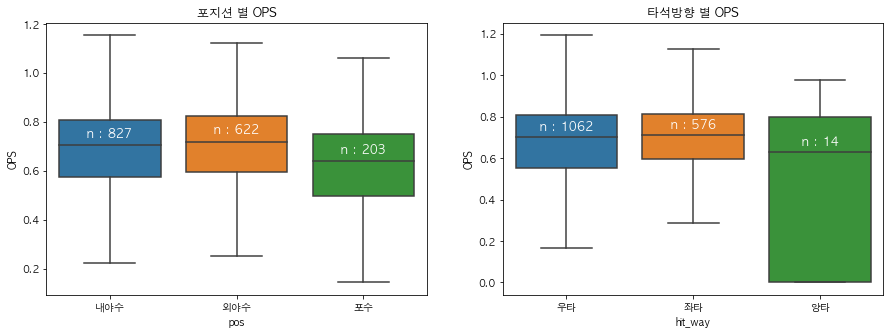

In [57]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x = 'pos', y = 'OPS', data = regularseason_df, showfliers = False)

medians = regularseason_df.groupby(['pos'])['OPS'].median().to_dict() ## 내야수 외야수 별 OPS

nobs = regularseason_df['pos'].value_counts().to_dict() # 내야수 외야수 별 count

for key in nobs : nobs[key] = "n : " + str(nobs[key])
    
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), \
           medians[label.get_text()] + 0.03, nobs[label.get_text()],
           horizontalalignment='center', size = 'large', color = 'w', weight = 'semibold')
ax.set_title('포지션 별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(x = 'hit_way', y = 'OPS', data = regularseason_df, showfliers = False)

medians = regularseason_df.groupby(['hit_way'])['OPS'].median().to_dict()

nobs = regularseason_df['hit_way'].value_counts().to_dict()

for key in nobs: nobs[key] = "n : " + str(nobs[key])
    
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), \
           medians[label.get_text()] + 0.03, nobs[label.get_text()],
           horizontalalignment='center', size = 'large', color = 'w', weight = 'semibold')
ax.set_title('타석방향 별 OPS')
plt.show()

큰 차이 없어보이고, 양타의 OPS는 수가 너무 적다

In [60]:
regularseason_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [61]:
foreign_country = regularseason_df['career'].apply(\
                                                  lambda x : x.replace('-', ' ').split(' ')[0])

foreign_country_list = list(set(foreign_country.apply(\
                                                lambda x : np.nan if '초' in x else x)))


In [64]:
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['네덜란드', '쿠바', '미국', '도미니카', '캐나다']

In [65]:
regularseason_df['country'] = foreign_country
regularseason_df['country'] = regularseason_df['country'].apply(\
                            lambda x : x if pd.isnull(x)
                                        else('foreign' if x in foreign_country_list else 'korean'))
regularseason_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


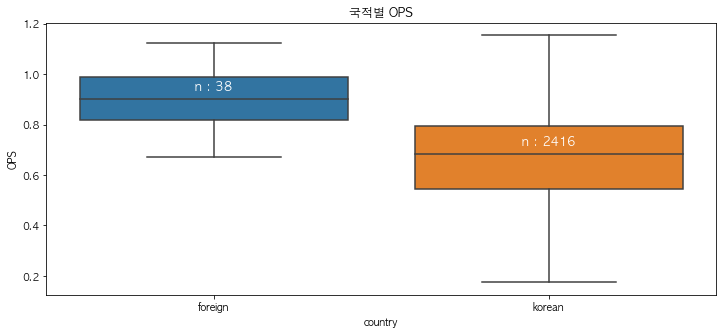

In [69]:
plt.figure(figsize = (12,5))
ax = sns.boxplot(x = 'country', y = 'OPS', data = regularseason_df, showfliers = False)

medians = regularseason_df.groupby(['country'])['OPS'].median().to_dict()

nobs = regularseason_df['country'].value_counts().to_dict()

for key in nobs : nobs[key] = "n : " + str(nobs[key])
    
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), \
           medians[label.get_text()] + 0.03, nobs[label.get_text()],
           horizontalalignment='center', size = 'large', color = 'w', weight = 'semibold')
ax.set_title('국적별 OPS')
plt.show()

외국인 선수들 수는 적지만 OPS가 확연히 좋음을 알 수 있다 

In [70]:
regularseason_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [72]:
regularseason_df['starting_salary'] = regularseason_df['starting_salary'].apply(\
                                lambda x : x if pd.isnull(x)
                                        else (int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))

In [73]:
regularseason_df['starting_salary']

0           NaN
1       10000.0
2       10000.0
3       10000.0
4       10000.0
         ...   
2449     4000.0
2450     4000.0
2451     4000.0
2452     4000.0
2453     4000.0
Name: starting_salary, Length: 2454, dtype: float64

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


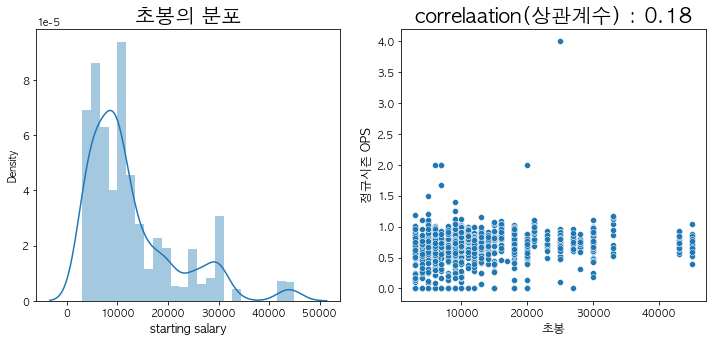

In [82]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
b = sns.distplot(regularseason_df['starting_salary'].loc[regularseason_df['starting_salary'].notnull()], hist = True)
b.set_xlabel("starting salary", fontsize = 12)
b.set_title("초봉의 분포", fontsize = 20)

plt.subplot(1,2,2)
correlation = regularseason_df['starting_salary'].corr(regularseason_df['OPS'])
b = sns.scatterplot(regularseason_df['starting_salary'], regularseason_df['OPS'])
b.axes.set_title('correlaation(상관계수) : ' + str(np.round(correlation,2)), fontsize = 20)
b.set_ylabel('정규시즌 OPS', fontsize = 12)
b.set_xlabel('초봉', fontsize = 12)
plt.show()

초봉과 OPS에도 큰 상관관계가 없는 것으로 보인다

In [84]:
day_by_day_df = pd.read_csv("./data/Regular_Season_Batter_Day_by_Day_b4.csv")
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [86]:
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x : str(x).split('.')[0])

In [87]:
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()

In [90]:
agg_df = agg_df.pivot_table(index = ['month'], columns = 'year', values = 'avg2')

In [91]:
agg_df ## 3월, 10월은 nan값이 있음 -> 3, 10월은 제외하자

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


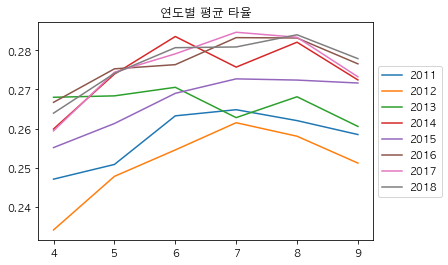

In [92]:
plt.plot(agg_df.iloc[2:,10:])
plt.legend(agg_df.iloc[2:,10:].columns,\
           loc = 'center left', bbox_to_anchor = (1,0.5))
plt.title('연도별 평균 타율')
plt.show()

5 ~ 6 월에 타율이 안정되는 모습을 볼 수 있음

### 데이터 전처리

In [93]:
pd.DataFrame(regularseason_df.isna().sum()).T

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


In [94]:
numerics = [
    'int16','int32','int64','float16','float32','float64'
]
num_cols = regularseason_df.select_dtypes(include=numerics).columns

In [95]:
num_cols

Index(['batter_id', 'year', 'avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E',
       'starting_salary', 'OPS', 'weight', 'height', 'weight_per_height'],
      dtype='object')

In [96]:
regularseason_df.loc[regularseason_df[num_cols].isna().sum(axis=1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [97]:
regularseason_df[regularseason_df.select_dtypes(include=numerics).columns] = \
                  regularseason_df[regularseason_df.select_dtypes(include=numerics).columns].fillna(0)
regularseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [99]:
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns] = \
                  day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3


In [100]:
preseason_df[preseason_df.select_dtypes(include=numerics).columns] = \
                  preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016


In [101]:
not_num_cols = [x for x in regularseason_df.columns if x not in num_cols]

In [103]:
regularseason_df.loc[regularseason_df[not_num_cols].isna().sum(axis = 1) > 0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN,korean


In [106]:
# 삭제할 데이터 추출
drop_idx = regularseason_df.loc[
    # 안타가 0개 이상이면서 장타율이 0인 경우
    ((regularseason_df['H'] > 0) & (regularseason_df['SLG']==0)) |
        
    # 안타가 0개 이상 혹은 볼넷이 0개 이상 혹은 몸에 맞은 볼이 0개 이상이면서
    # 출루율이 0인 경우
    (((regularseason_df['H'] > 0) |
      (regularseason_df['BB'] > 0) |
      (regularseason_df['HBP'] > 0)) &
     (regularseason_df['OBP'] == 0))
].index         

In [108]:
regularseason_df = regularseason_df.drop(index = drop_idx).reset_index(drop = True)
regularseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2443,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2444,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2445,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


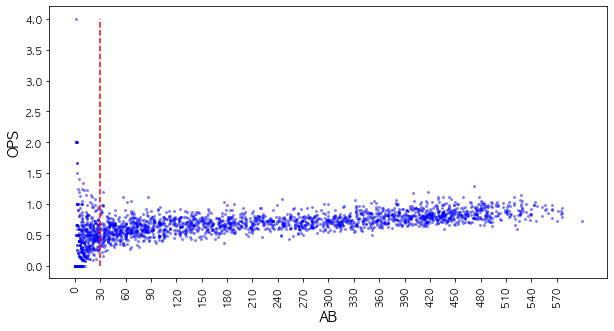

In [111]:
plt.figure(figsize=(10,5))
plt.plot('AB',"OPS", data = regularseason_df, linestyle = 'none', marker = 'o', markersize = 2,\
         color = 'blue', alpha = 0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regularseason_df.AB),max(regularseason_df.AB), 30,)),rotation = 90)
plt.vlines(30, ymin=min(regularseason_df['OPS']),ymax=max(regularseason_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

In [118]:
#이상치 탐색 
Q1 = regularseason_df['OPS'].quantile(0.25)
Q3 = regularseason_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

regularseason_df.loc[
    (regularseason_df['OPS'] < (Q1 - 1.5 *IQR))|
    (regularseason_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(by = 'AB', axis = 0, ascending = False)\
    [['batter_name','AB','year','OPS']]

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
1318,유재신,33,2018,1.192000
416,김원섭,25,2005,0.116923
1543,이여상,22,2013,0.090909
...,...,...,...,...
1190,양영동,0,2006,0.000000
662,마낙길,0,2015,0.000000
1047,손주인,0,2002,0.000000
2131,지성준,0,2016,0.000000


In [119]:
# 7.01~7.31 숫자 생성 후 반 올림
major_ticks = list(np.round(np.linspace(7.01,7.31, 31),2)) 


In [135]:
july = day_by_day_df[(day_by_day_df.date >= 7) &
              ( day_by_day_df.date < 8)].index

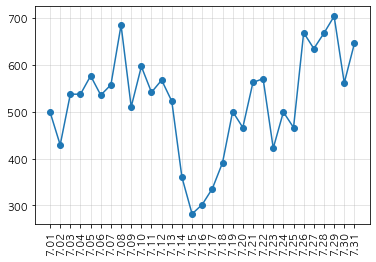

In [139]:
plt.plot(major_ticks,
         day_by_day_df['date'].loc[july].value_counts().sort_index(), marker='o')
plt.grid(linestyle = '-', alpha = 0.4)
plt.xticks(major_ticks, rotation= 90)
plt.show()

시간변수

In [160]:
def lag_function(df, var_name, past):
    # df = 시간변수를 생성할 데이터 프레임
    # var_name = 시간변수 생성의 대상이 되는 변수 이름
    # past = 몇 년 전의 성적을 생성할지 결정 (정수형)
    df.reset_index(drop = True, inplace = True)
    df['lag'+str(past)+'_'+var_name] = np.nan
    df['lag'+str(past)+'_'+'AB'] = np.nan
    
    for col in ['AB', var_name]:
        for i in range(0, (max(df.index)+1)):
            
            val = df.loc[(df['batter_name'] == df['batter_name'][i]) & 
                         (df['year'] == df['year'][i] - past), col]
            # 과거 기록이 결측치가 아니라면 값을 넣기
            if(len(val) != 0):
                df.loc[i, 'lag' + str(past) + '_' + col] = val.iloc[0]
    
    df.loc[df['lag'+str(past)+'_'+'AB']<30, 'lag' + str(past) + '_' + var_name] = np.nan
    df.drop('lag' + str(past) + '_' + 'AB', axis = 1, inplace = True)

    return df    

In [165]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(regularseason_df.select_dtypes(include=numerics).drop(\
                     ['batter_id','year','OPS','SLG'], axis =1).columns)
regularseason_temp = regularseason_df[numeric_cols + ['year', 'batter_name']].copy()
regularseason_temp = regularseason_temp.loc[regularseason_temp['AB'] >= 30]

In [167]:
## 1년 전 성적 추출
for col in numeric_cols:
    regularseason_temp = lag_function(regularseason_temp,col,1)

In [169]:
numeric_cols.remove('OBP')
regularseason_temp.drop(numeric_cols,axis = 1, inplace = True)

In [171]:
corr_matrix = regularseason_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'OBP', axis = 0, ascending = True)
corr_matrix = corr_matrix[corr_matrix.index]

/var/folders/8q/g18mqmr12mz1zcgcy01fyqb00000gn/T/ipykernel_81345/1209698661.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype = np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

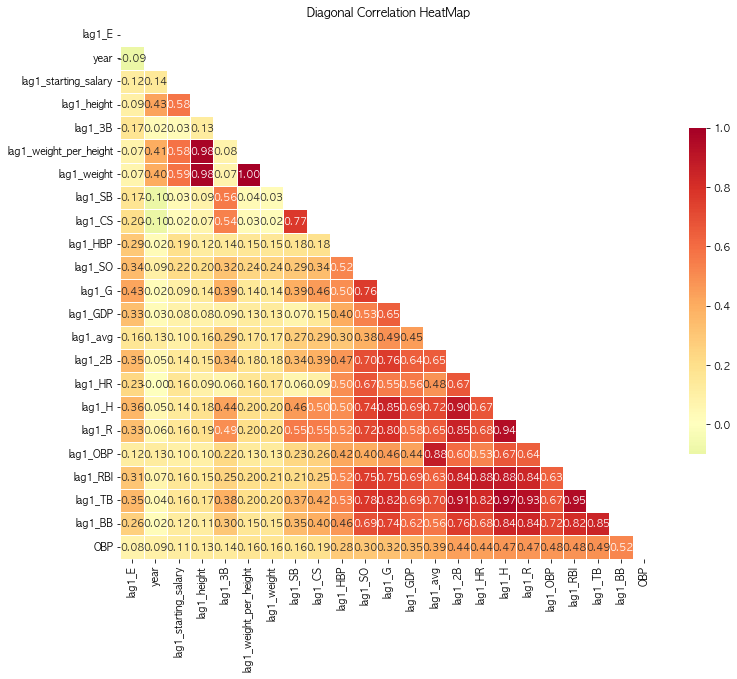

In [175]:
f, ax = plt.subplots(figsize = (12,12))
corr = regularseason_temp.select_dtypes(exclude = ['object','bool']).corr()

mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap = 'RdYlGn_r', vmax = 1, mask = mask,
               center = 0, annot = True, fmt = '.2f',square = True, linewidths = .5, cbar_kws = {"shrink" : .5})
plt.title("Diagonal Correlation HeatMap")

In [176]:
## 희생 플라이 구하기
## OBP 계산 공식 이용하여 SF 계산 (H + BB + HBP) / OBP - (AB+ BB + HBP)

regularseason_df['SF'] = regularseason_df[['H','BB','HBP']].sum(axis = 1) / regularseason_df['OBP'] - \
                        + regularseason_df[['AB','BB','HBP']].sum(axis = 1)
regularseason_df['SF'].fillna(0, inplace = True)
regularseason_df['SF'] = regularseason_df['SF'].apply(lambda x : round(x,0))


SyntaxError: unexpected EOF while parsing (2109802267.py, line 4)

In [ ]:
plt.title('correlation 상관계수:' + str(np.round(correlation, 2)))